<a href="https://colab.research.google.com/github/ramdeveloper1985/datascience/blob/master/Rakuten_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6, 6) ### Setting the size of the Plots

In [7]:
dirpath = os.getcwd()
print(dirpath)

/content


In [0]:
PATH = dirpath+'/data/'
if not os.path.exists(PATH):
    os.makedirs(PATH)

In [19]:
print(PATH)

/content/data/


In [11]:
dataFilePath=PATH+'data.csv'
print(dataFilePath)

/content/data/data.csv


In [28]:
raw_data = pd.read_csv(dataFilePath,index_col='car name')
data = raw_data.copy()
data.shape

(398, 8)

In [29]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,NaN,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [0]:
data.rename(columns={'model year':'model_year'}, inplace=True)

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    394 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 28.0+ KB
None


In [32]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,394.000000,398.000000,398.000000
mean,23.514573,6.766332,193.425879,104.469388,2970.424623,15.575381,76.512563,1.572864
std,7.815984,20.365258,104.269838,38.491160,846.841774,2.765275,8.326377,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.200000,79.000000,2.000000
max,46.600000,400.000000,455.000000,230.000000,5140.000000,24.800000,182.000000,3.000000


**Univariate Analysis** - Catogorical data - *cylinders*

cylinders
3        4
4      203
5        3
6       83
8      102
60       1
80       1
400      1
dtype: int64


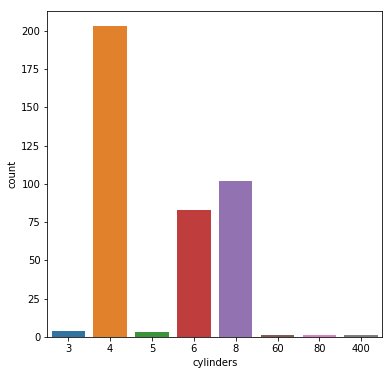

In [33]:
#print(data.cylinders.unique())
print(data.groupby('cylinders').size())
sns.countplot(data.cylinders,label="Count")

In [34]:
data.query('cylinders==60 | cylinders==80 | cylinders==400')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car name,,,,,,,,
amc ambassador dpl,15.0,80,390.0,190.0,3850,8.5,70,1
plymouth duster,22.0,60,198.0,95.0,2833,15.5,70,1
volkswagen super beetle,26.0,400,97.0,46.0,1950,21.0,73,2


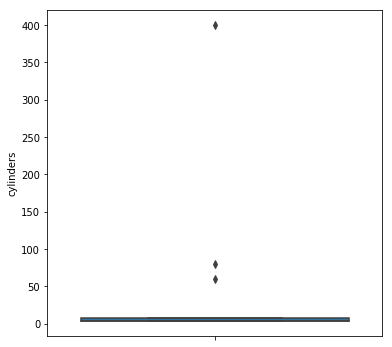

In [35]:
sns.boxplot( y=data["cylinders"] )
#sns.plt.show()


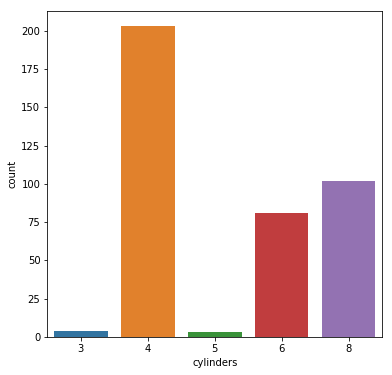

In [36]:
indexNames = data[(data['cylinders'] == 60) | (data['cylinders'] == 80) |(data['cylinders'] == 400)].index
#print(indexNames)
data.drop(indexNames , inplace=True)
sns.countplot(data['cylinders'],label="Count")


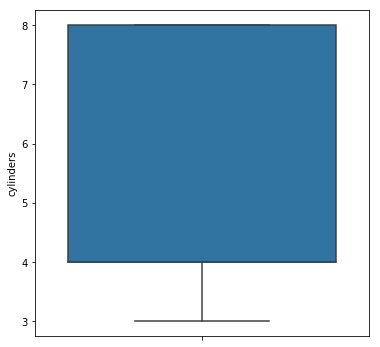

In [37]:
sns.boxplot(y=data["cylinders"])

In [0]:
#data['cylinders'] = data['cylinders'].replace({3: 'cylinders_3', 4: 'cylinders_4',5: 'cylinders_5',6: 'cylinders_6',8: 'cylinders_8'})
#data.cylinders.unique()

In [0]:
#data = pd.get_dummies(data, columns=['origin'])
#data.head()

**Univariate Analysis** - Catogorical data - *model_year*

model_year
70     27
71     28
72     28
73     38
74     26
75     30
76     34
77     28
78     36
79     29
80     29
81     28
82     30
181     1
182     1
dtype: int64


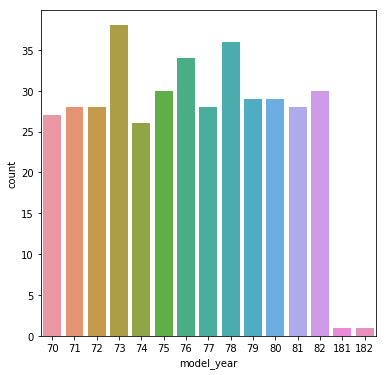

In [38]:
print(data.groupby('model_year').size())
sns.countplot(data['model_year'],label="Count")

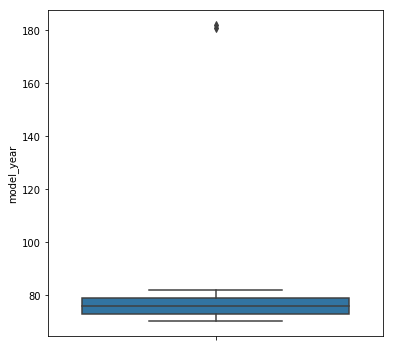

In [39]:
sns.boxplot(y=data["model_year"])

In [40]:
data.query('model_year==181 | model_year==182')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car name,,,,,,,,
chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,181,1
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,182,1


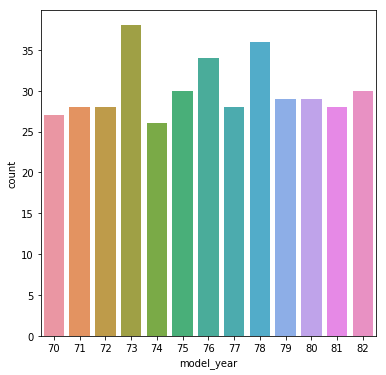

In [41]:
indexNames = data[(data['model_year'] == 181) | (data['model_year'] == 182)].index
# print(indexNames)
data.drop(indexNames , inplace=True)
sns.countplot(data['model_year'],label="Count")

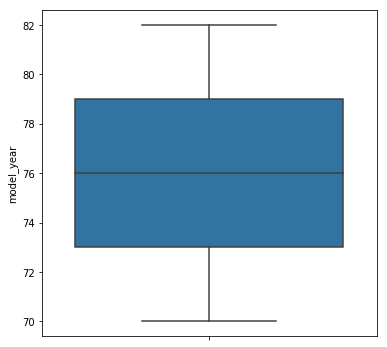

In [42]:
sns.boxplot(y=data["model_year"])

**Univariate Analysis** - Catogorical data - *origin*

origin
1    243
2     69
3     79
dtype: int64


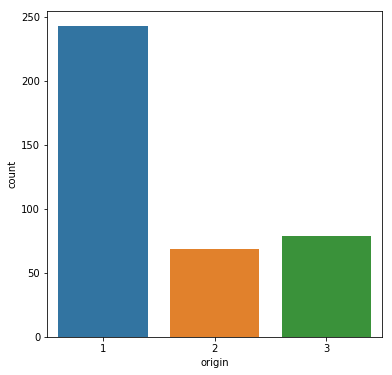

In [43]:
print(data.groupby('origin').size())
sns.countplot(data['origin'],label="Count")

In [44]:
data['origin'] = data['origin'].replace({1: 'country_1', 2: 'country_2', 3: 'country_3'})
data.origin.unique()

array(['country_1', 'country_3', 'country_2'], dtype=object)

In [45]:
data = pd.get_dummies(data, columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
amc rebel sst,16.0,8,304.0,150.0,3433,NaN,70,1,0,0
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


**Univariate Analysis** - Continuos data

In [46]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
count,391.000000,391.000000,391.000000,385.000000,391.000000,387.000000,391.000000,391.000000,391.000000,391.000000
mean,23.550384,5.450128,193.190537,104.571429,2970.166240,15.573643,76.033248,0.621483,0.176471,0.202046
std,7.862824,1.707283,104.567339,38.445249,851.201655,2.752103,3.676874,0.485639,0.381708,0.402041
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,102.500000,75.000000,2221.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,93.000000,2795.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,129.000000,3611.000000,17.250000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [47]:
print(data.isnull().sum())

mpg                 0
cylinders           0
displacement        0
horsepower          6
weight              0
acceleration        4
model_year          0
origin_country_1    0
origin_country_2    0
origin_country_3    0
dtype: int64


In [48]:
data[data.horsepower.isna() | data.acceleration.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
car name,,,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,NaN,70,1,0,0
amc gremlin,21.0,6,199.0,90.0,2648,NaN,70,1,0,0
ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
amc hornet,18.0,6,232.0,100.0,2945,NaN,73,1,0,0
ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
honda civic cvcc,36.1,4,91.0,60.0,1800,NaN,78,0,0,1
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
renault 18i,34.5,4,100.0,NaN,2320,15.8,81,0,1,0


In [49]:
mean_horsepower = np.mean(data.horsepower)
print('Avg of the horsepower ' + str(mean_horsepower))
data.horsepower = data.horsepower.fillna(mean_horsepower)
data[data.horsepower.isna()]

Avg of the horsepower 104.57142857142857


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
car name,,,,,,,,,,


In [50]:
mean_acceleration = np.mean(data.acceleration)
print('Avg of the acceleration ' + str(mean_acceleration))
data.acceleration = data.acceleration.fillna(mean_acceleration)
data[data.acceleration.isna()]

Avg of the acceleration 15.573643410852696


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
car name,,,,,,,,,,


In [51]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.550384,5.450128,193.190537,104.571429,2970.166240,15.573643,76.033248,0.621483,0.176471,0.202046
std,7.862824,1.707283,104.567339,38.148370,851.201655,2.737953,3.676874,0.485639,0.381708,0.402041
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,102.500000,75.500000,2221.500000,13.850000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,95.000000,2795.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,125.000000,3611.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
def find_outlier(ds, col):
  q1=ds[col].quantile(0.25)
  q3=ds[col].quantile(0.75)
  #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
  IQR=q3-q1
  low_val=q1-1.5*IQR
  high_val=q3+1.5*IQR
  print('1st Quartile ' + str(round(q1,2)))
  print('3rd Quartile ' + str(round(q3,2)))
  print('IQR ' + str(round(IQR,2)))
  print('Lower bound ' + str(round(low_val,2)))
  print('Upper bound ' + str(round(high_val,2)))
  ds=ds.loc[(ds[col]<low_val) | (ds[col]>high_val)]
  print('Number of outliers ' + str(len(ds.index)))
  return ds

In [53]:
colNames = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
for col in colNames:
  print("==============================")
  print(col)
  outliers=find_outlier(data,col)

mpg
1st Quartile 17.25
3rd Quartile 29.0
IQR 11.75
Lower bound -0.38
Upper bound 46.62
Number of outliers 0
displacement
1st Quartile 102.5
3rd Quartile 264.5
IQR 162.0
Lower bound -140.5
Upper bound 507.5
Number of outliers 0
horsepower
1st Quartile 75.5
3rd Quartile 125.0
IQR 49.5
Lower bound 1.25
Upper bound 199.25
Number of outliers 11
weight
1st Quartile 2221.5
3rd Quartile 3611.0
IQR 1389.5
Lower bound 137.25
Upper bound 5695.25
Number of outliers 0
acceleration
1st Quartile 13.85
3rd Quartile 17.2
IQR 3.35
Lower bound 8.83
Upper bound 22.22
Number of outliers 6


In [0]:
def remove_outlier(ds,col):
  q1=ds[col].quantile(0.25)
  q3=ds[col].quantile(0.75)
  IQR=q3-q1
  low_val=q1-1.5*IQR
  high_val=q3+1.5*IQR
  ds_out=ds.loc[(ds[col]>low_val) & (ds[col]<high_val)]
  return ds_out

In [0]:
pd.set_option('mode.chained_assignment', None)

In [56]:
outliers=find_outlier(data, 'horsepower')
q1=data['horsepower'].quantile(0.25)
q3=data['horsepower'].quantile(0.75)
IQR=q3-q1
outliers.loc[:,'horsepower']=1.5*IQR
outlier_removed_rows=remove_outlier(data,'horsepower')
data_mod=outlier_removed_rows.append(outliers)
data_mod.describe()

1st Quartile 75.5
3rd Quartile 125.0
IQR 49.5
Lower bound 1.25
Upper bound 199.25
Number of outliers 11


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.550384,5.450128,193.190537,100.552886,2970.166240,15.573643,76.033248,0.621483,0.176471,0.202046
std,7.862824,1.707283,104.567339,33.254942,851.201655,2.737953,3.676874,0.485639,0.381708,0.402041
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,102.500000,75.000000,2221.500000,13.850000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,90.000000,2795.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,115.000000,3611.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,198.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [57]:
outliers=find_outlier(data, 'acceleration')
q1=data['acceleration'].quantile(0.25)
q3=data['acceleration'].quantile(0.75)
IQR=q3-q1
outliers.loc[:,'acceleration']=1.5*IQR
outlier_removed_rows=remove_outlier(data,'acceleration')
data_mod=outlier_removed_rows.append(outliers)
data_mod.describe()

1st Quartile 13.85
3rd Quartile 17.2
IQR 3.35
Lower bound 8.83
Upper bound 22.22
Number of outliers 6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.550384,5.450128,193.190537,104.571429,2970.166240,15.361495,76.033248,0.621483,0.176471,0.202046
std,7.862824,1.707283,104.567339,38.148370,851.201655,2.851349,3.676874,0.485639,0.381708,0.402041
min,9.000000,3.000000,68.000000,46.000000,1613.000000,5.025000,70.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,102.500000,75.500000,2221.500000,13.650000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,95.000000,2795.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,125.000000,3611.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f58c7f240>,
      dtype=object)

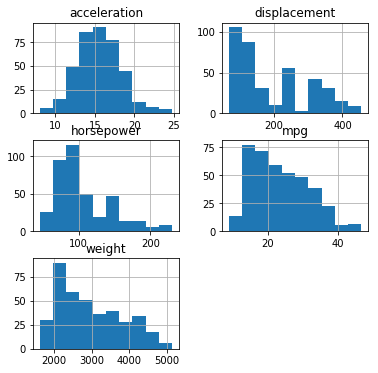

In [70]:
colNames = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
data.hist(column=colNames)

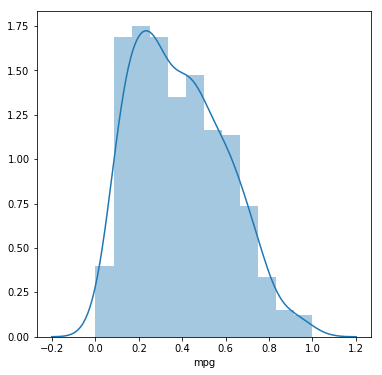

In [147]:
sns.distplot(data['mpg'])

In [146]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_country_1,origin_country_2,origin_country_3
mpg,1,-0.77,-0.8,-0.78,-0.83,0.42,0.58,-0.57,0.26,0.44
cylinders,-0.77,1,0.95,0.84,0.9,-0.5,-0.35,0.6,-0.35,-0.4
displacement,-0.8,0.95,1,0.89,0.93,-0.53,-0.37,0.65,-0.37,-0.44
horsepower,-0.78,0.84,0.89,1,0.86,-0.67,-0.41,0.49,-0.28,-0.33
weight,-0.83,0.9,0.93,0.86,1,-0.41,-0.31,0.6,-0.29,-0.44
acceleration,0.42,-0.5,-0.53,-0.67,-0.41,1,0.28,-0.24,0.2,0.11
model_year,0.58,-0.35,-0.37,-0.41,-0.31,0.28,1,-0.14,-0.022,0.19
origin_country_1,-0.57,0.6,0.65,0.49,0.6,-0.24,-0.14,1,-0.59,-0.64
origin_country_2,0.26,-0.35,-0.37,-0.28,-0.29,0.2,-0.022,-0.59,1,-0.23
origin_country_3,0.44,-0.4,-0.44,-0.33,-0.44,0.11,0.19,-0.64,-0.23,1


In [0]:
data_withoutscaling=data.copy()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [0]:
def modelBuilder(dataset,features,target):
  X = pd.DataFrame(dataset[features].copy())
  y = dataset[target].copy()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
  X_train.shape[0] == y_train.shape[0]
  regressor = LinearRegression()
  model=regressor.fit(X_train,y_train)
  y_train_predict = regressor.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
  r2 = r2_score(y_train, y_train_predict)
  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  #regressor.score(X_test, y_test)
  print("\n")
  y_test_predict = regressor.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
  r2 = r2_score(y_test, y_test_predict)
  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  #regressor.score(X_test, y_test)
  print("\n")
  print('regressor.coef_')
  print("--------------------------------------")
  for i in regressor.coef_:
    print(round(i,2), end=" ")
  print('Regression plot on train data')
  plt.scatter(x=y_train, y=y_train_predict)
  plt.show()
  print('Regression plot on test data')
  plt.scatter(x=y_test, y=y_test_predict)
  plt.show()

**Checking normality of residuals **

Shapiro Wilk test  from scipy library to check the normality of residuals.

Null Hypothesis: The residuals are normally distributed.

Alternative Hypothesis: The residuals are not normally distributed.


**Checking for autocorrelation** To ensure the absence of autocorrelation we use Ljungbox test.

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

**Checking heteroscedasticity** Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [0]:
from scipy import stats
from statsmodels.stats import diagnostic as diag
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

def ols_model_summary(dataset,features,target):
  X = pd.DataFrame(dataset[features].copy())
  y = dataset[target].copy()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
  X_train.shape[0] == y_train.shape[0]
  ols_model=sm.OLS(y_train,X_train)
  result=ols_model.fit()
  print(result.summary())
  print('\n')
  print('Checking normality of residuals')
  print("--------------------------------------")
  print(stats.shapiro(result.resid))
  print('\n')
  print('Checking for autocorrelation')
  print("--------------------------------------")
  print(diag.acorr_ljungbox(result.resid , lags = 1) )
  print('\n')
  print('Checking heteroscedasticity')
  print("--------------------------------------")
  name = ['F statistic', 'p-value']
  test = sms.het_goldfeldquandt(result.resid, result.model.exog)
  lzip(name, test)
  print(lzip(name, test))
  print('\n')

The model performance for training set
--------------------------------------
RMSE is 3.216652644424941
R2 score is 0.835408683826966


The model performance for testing set
--------------------------------------
RMSE is 3.4347211200984376
R2 score is 0.8004340113693382


regressor.coef_
--------------------------------------
-0.7 0.03 0.0 -0.01 0.13 0.78 -1.85 0.93 0.92 Regression plot on train data


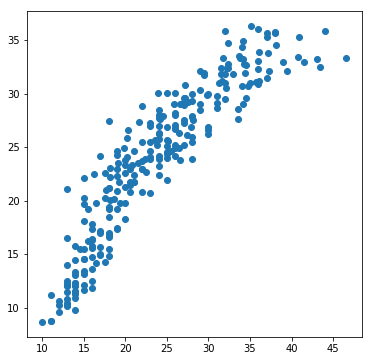

Regression plot on test data


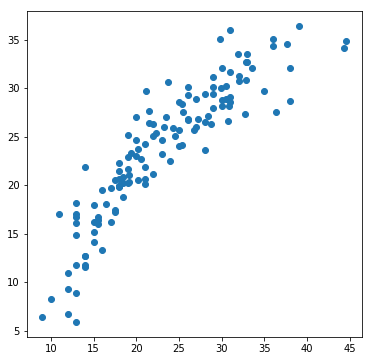

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     159.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           3.79e-94
Time:                        02:55:09   Log-Likelihood:                -675.28
No. Observations:                 261   AIC:                             1369.
Df Residuals:                     252   BIC:                             1401.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders           -0.7044      0.389  

In [141]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
data_withoutscaling=data.copy()
modelBuilder(data_withoutscaling,features,'mpg')
ols_model_summary(data_withoutscaling,features,'mpg')

In [0]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

The model performance for training set
--------------------------------------
RMSE is 0.08554927245811016
R2 score is 0.8354086838269659


The model performance for testing set
--------------------------------------
RMSE is 0.09134896596006499
R2 score is 0.8004340113693376


regressor.coef_
--------------------------------------
-0.02 0.28 0.0 -0.71 0.06 0.02 -0.05 0.02 0.02 Regression plot on train data


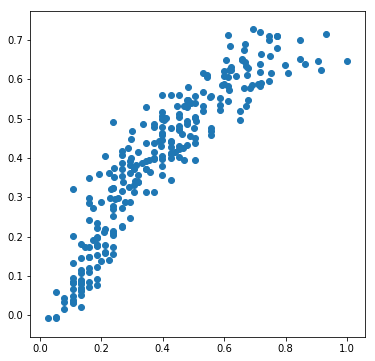

Regression plot on test data


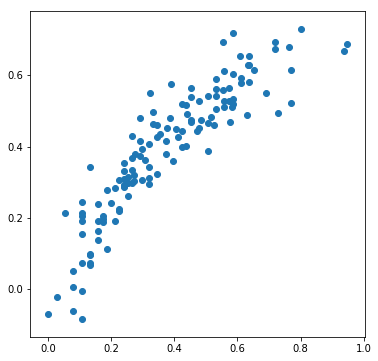

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     159.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           3.79e-94
Time:                        02:55:22   Log-Likelihood:                -675.28
No. Observations:                 261   AIC:                             1369.
Df Residuals:                     252   BIC:                             1401.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders           -0.7044      0.389  

In [143]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
data_withscaling=data.copy()
data_withscaling['displacement'] = scale(data_withscaling['displacement'])
data_withscaling['horsepower'] = scale(data_withscaling['horsepower'])
data_withscaling['acceleration'] = scale(data_withscaling['acceleration'])
data_withscaling['weight'] = scale(data_withscaling['weight'])
data_withscaling['mpg'] = scale(data_withscaling['mpg'])
modelBuilder(data_withscaling,features,'mpg')
ols_model_summary(data_withoutscaling,features,'mpg')

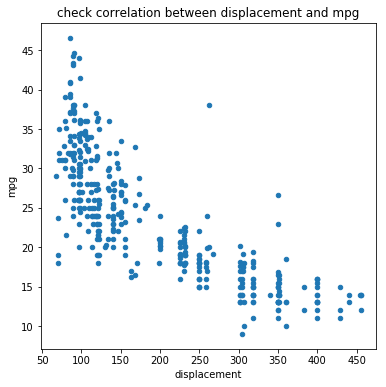

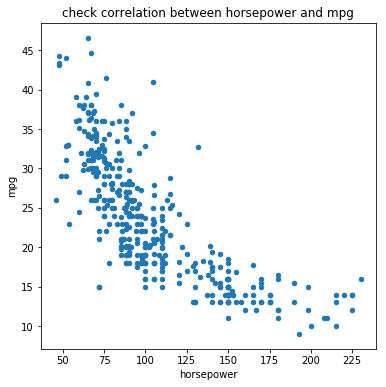

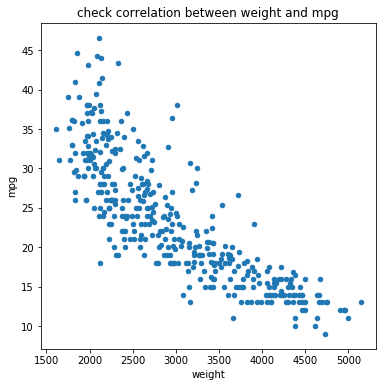

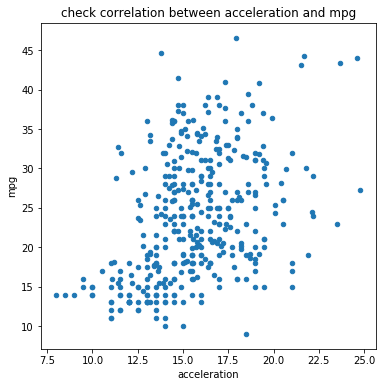

In [144]:
data.plot(x='displacement',y='mpg',kind='scatter',title='check correlation between displacement and mpg')
data.plot(x='horsepower',y='mpg',kind='scatter',title='check correlation between horsepower and mpg')
data.plot(x='weight',y='mpg',kind='scatter',title='check correlation between weight and mpg')
data.plot(x='acceleration',y='mpg',kind='scatter',title='check correlation between acceleration and mpg')
plt.show()

In [0]:

def GBRegressionModel(dataset, features, target):
  X = pd.DataFrame(dataset[features].copy())
  y = dataset[target].copy()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
  X_train.shape[0] == y_train.shape[0]
  gb_regressor = GradientBoostingRegressor(n_estimators=4000)
  gb_regressor.fit(X_train,y_train)
  gb_regressor.get_params()
  y_predicted_gbr = gb_regressor.predict(X_test)
  rmse_gbr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
  r2_gbr = r2_score(y_test, y_predicted_gbr)
  print('RMSE is {}'.format(rmse_gbr))
  print('R2 score is {}'.format(r2_gbr))
  fi= pd.Series(gb_regressor.feature_importances_,index=factors)
  fi.plot.barh()

RMSE is 3.461980118466214
R2 score is 0.7972538081464605


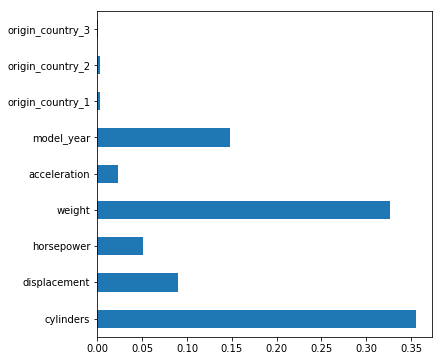

In [153]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
target='mpg'
data_withoutscaling=data.copy()
GBRegressionModel(data_withoutscaling,features,target)

RMSE is 0.09194949405986383
R2 score is 0.7978014930231523


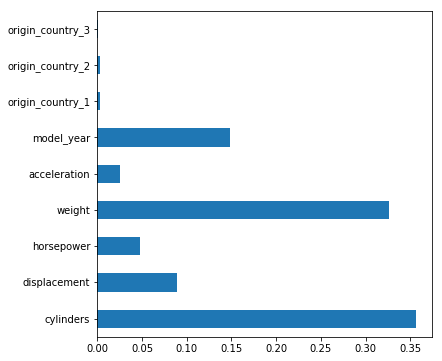

In [154]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
target='mpg'
data_withscaling=data.copy()
data_withscaling['displacement'] = scale(data_withscaling['displacement'])
data_withscaling['horsepower'] = scale(data_withscaling['horsepower'])
data_withscaling['acceleration'] = scale(data_withscaling['acceleration'])
data_withscaling['weight'] = scale(data_withscaling['weight'])
data_withscaling['mpg'] = scale(data_withscaling['mpg'])
GBRegressionModel(data_withscaling,features,target)

In [0]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
def RFRegressionModel(dataset,features,target):
  X = pd.DataFrame(dataset[features].copy())
  y = dataset[target].copy()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
  X_train.shape[0] == y_train.shape[0]
  rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
  # Train the model on training data
  rf.fit(X_train,y_train)
  y_pred = regressor.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
  r2_rf = rf.score(X_train, y_train)
  print('R Squared:' + str(r2_rf))
  print(rf.feature_importances_)


In [178]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
target='mpg'
data_withscaling=data.copy()
data_withscaling['displacement'] = scale(data_withscaling['displacement'])
data_withscaling['horsepower'] = scale(data_withscaling['horsepower'])
data_withscaling['acceleration'] = scale(data_withscaling['acceleration'])
data_withscaling['weight'] = scale(data_withscaling['weight'])
data_withscaling['mpg'] = scale(data_withscaling['mpg'])
RFRegressionModel(data_withscaling,features,target)


Mean Absolute Error: 38.24631787035581
Mean Squared Error: 1477.3989629375005
Root Mean Squared Error: 38.43694788790469
R Squared:0.9869930963451156
[0.46726572 0.06271353 0.06487479 0.24637912 0.023902   0.12757515
 0.00226336 0.0024641  0.00256223]


In [179]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_country_1','origin_country_2','origin_country_3']
target='mpg'
data_withoutscaling=data.copy()
RFRegressionModel(data_withoutscaling,features,target)

Mean Absolute Error: 2.6533946102189594
Mean Squared Error: 11.797309172850264
Root Mean Squared Error: 3.4347211200984376
R Squared:0.9869954989807844
[0.46863149 0.0613549  0.06449508 0.24648882 0.02430804 0.12757823
 0.00215337 0.00246004 0.00253002]
